In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import random
from torch.optim import LBFGS
from tqdm import tqdm
import scipy.io
import sys

sys.path.append("../")
sys.path.append("../..")
from util import *
from model.pinn import PINNs

# 无粘Burgers方程: u_t + u*u_x = 0
# IC:u(x, 0) = sin
# BC:u(0, t) = u(2π, t)

# 构造burgers

无粘Burgers方程: u_t + u*u_x = 0, [-1, 1]*[0, 0.5]

IC:u(x, 0) = 1, x<=0; u(x, 0) = -1, x>0

BC:u(0, t) = u(2π, t)

points:  (202, 202, 2)
(202, 202)


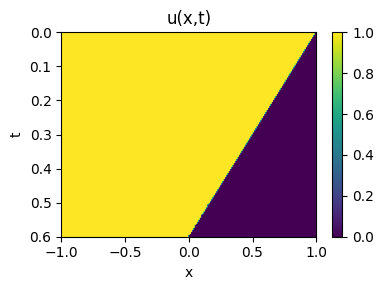

In [4]:
def get_data(x_range, y_range, x_num, y_num):
    # 在[0,X]*[0,T]区域采样
    x = np.linspace(x_range[0], x_range[1], x_num)  # [x_range0, x_range1]
    t = np.linspace(y_range[0], y_range[1], y_num)  # [y_range0, y_range1]
    x_mesh, t_mesh = np.meshgrid(x,t)
    data = np.concatenate((np.expand_dims(x_mesh, -1), np.expand_dims(t_mesh, -1)), axis=-1)

    return data

def get_burgers(x, t):
    # 真解： u(x, t) =1, x ≤ t/2; u(x, 0) =0, x > t/2
    # x t: [t_size, x_size]
    u = np.where(x <= t/2, 1, 0)

    return u


X_SIZE = 202
T_SIZE = 202

data = get_data([-1, 1], [2, 0], X_SIZE, T_SIZE)  # (101, 1024, 2)
print('points: ', data.shape)
x = data[..., 0]
t = data[..., 1]

u = get_burgers(x, t)
print(u.shape)

plt.figure(figsize=(4,3))
plt.imshow(u, extent=[-1,1,0.6,0], aspect='auto')
plt.xlabel('x')
plt.ylabel('t')
plt.title('u(x,t)')
plt.colorbar()
plt.tight_layout()
plt.show()

# 定义保存的字典，键名为 'u'
data_dict = {'u': u}

# 使用 scipy.io.savemat 保存为 .mat 文件
scipy.io.savemat('burgers_move_202.mat', data_dict)
# [[0.    0.    0.    ... 0.    0.    0.   ]
#  [0.006 0.006 0.006 ... 0.006 0.006 0.006]
#  [0.012 0.012 0.012 ... 0.012 0.012 0.012]
#  ...
#  [0.588 0.588 0.588 ... 0.588 0.588 0.588]
#  [0.594 0.594 0.594 ... 0.594 0.594 0.594]
#  [0.6   0.6   0.6   ... 0.6   0.6   0.6  ]]

(202, 202)


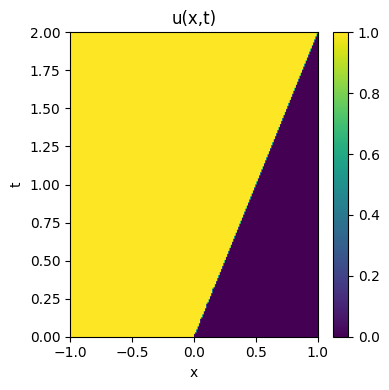

In [7]:
path = '/home/pengguohang/python_test/HCL/pinnsformer/demo/Burgers_move/burgers_move_202.mat'

data = scipy.io.loadmat(path)
u = data['u']
print(u.shape)
plt.figure(figsize=(4,4))
plt.imshow(u, extent=[-1,1,0,2], aspect='auto')
plt.xlabel('x')
plt.ylabel('t')
plt.title('u(x,t)')
plt.colorbar()
plt.tight_layout()
plt.show()